## 逻辑回归-线性可分
### 案例：根据学生的两门学生成绩，预测该学生是否会被大学录取
#### 数据集：ex2data1.txt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path, names=['Exam 1', 'Exam 2', 'Accepted'])
data.head()

,Exam 1,Exam 2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


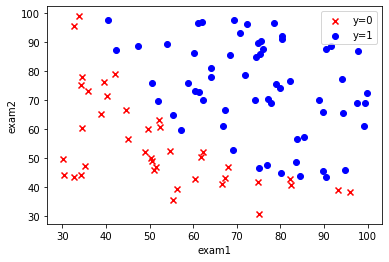

In [3]:
fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam 1'],data[data['Accepted']==0]['Exam 2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam 1'],data[data['Accepted']==1]['Exam 2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='exam1',
          ylabel='exam2')
plt.show()

In [4]:
def get_Xy(data):
    
    data.insert(0,'ones',1)
    X_ = data.iloc[:,0:-1]
    X = X_.values
    
    y_ = data.iloc[:,-1]
    y = y_.values.reshape(len(y_),1)
    
    return X,y

In [5]:
X,y = get_Xy(data)

In [6]:
X.shape

(100, 3)

In [7]:
y.shape

(100, 1)

In [8]:
def sigmoid(z):
    
    return 1 / (1 + np.exp(-z))

In [9]:
def costFunction(X,y,theta):
    
    A = sigmoid(X@theta)
    
    first = y * np.log(A)
    second = (1-y) * np.log(1-A)
    
    return -np.sum(first + second) / len(X)

L2 loss

In [10]:
theta = np.zeros((3,1))
theta.shape

(3, 1)

In [11]:
cost_init = costFunction(X,y,theta)
print(cost_init)

0.6931471805599453


In [12]:
def gradientDescent(X,y,theta,iters,alpha):
    m = len(X)
    costs = []
    
    for i in range(iters):
        A = sigmoid(X@theta)
        theta  = theta -(alpha/m)  * X.T @ (A - y)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        if i % 1000 == 0:
            print(cost)
    return costs, theta

In [13]:
alpha = 0.004
iters=200000

In [14]:
costs,theta_final =  gradientDescent(X,y,theta,iters,alpha)

1.9886538578930084
3.0781700198641557
5.487009635362496
1.8519433661332647
2.955128942408359
5.438688730769618
1.8046128090728513
2.8312715776074056
5.3886531633606145
1.756153811712156
2.7066763807478127
5.3365673644957425
1.7062807047694801
2.5818508519054273
5.281774101800353
1.6544129958512053
2.457843094743575
5.223255119969365
1.5996612097145546
2.3362477519414626
5.159653459570274
1.5408871901849082
2.2190492038468888
5.089387088751128
1.4768567851081469
2.1082685090536497
5.010845104587983
1.4064493632805855
2.005433890383271
4.9225734611717336
1.3288041261254437
1.9109646054893665
4.82325748482661
1.243220225097169
1.8235866121521405
4.711246821296763
1.1486277932139568
1.7397667362447993
4.5832574004573505
1.0423478306006684
1.6525865746034032
4.430932868329269
0.9166267386002196
1.5465331276550862
4.224624720512682
0.7330944584991168
1.453494463115446
3.6099185491269976
3.831606666839808
1.1718258712790515
0.334478044895226
1.6078416216802416
0.741586759654691
0.271411734584

In [15]:
theta_final

array([[-23.77445621],
       [  0.20684474],
       [  0.19996049]])

In [16]:
def predict(X,theta):
    
    prob = sigmoid(X@theta)
    
    return [1 if x >= 0.5 else 0 for x in prob]

In [17]:
y_ = np.array(predict(X,theta_final))
y_pre = y_.reshape(len(y_),1)

acc  = np.mean(y_pre == y)

print(acc)

0.91


In [18]:
coef1 = - theta_final[0,0] / theta_final[2,0]
coef2 = - theta_final[1,0] / theta_final[2,0]

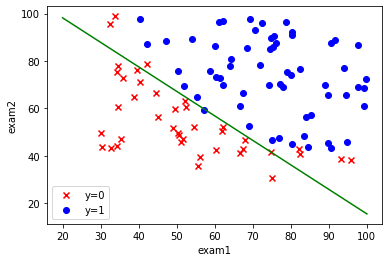

In [20]:
x = np.linspace(20,100,100)
f = coef1 + coef2 * x

fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam 1'],data[data['Accepted']==0]['Exam 2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam 1'],data[data['Accepted']==1]['Exam 2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='exam1',
          ylabel='exam2')

ax.plot(x,f,c='g')
plt.show()